## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# 2. Data Preparation
## 2.1 Loading Libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3
import shutil

## 2.2 Loading Datasets

In [2]:
# Unpacking the imdb file
shutil.unpack_archive("im.db.zip")

#Creating a connection
conn = sqlite3.connect("im.db")
cur = conn.cursor()

In [3]:
# Fetching table names
cur.execute(""" SELECT name FROM sqlite_master WHERE type='table';""")
tables = cur.fetchall()

In [4]:
# Loading csv datasets
budget_df = pd.read_csv("tn.movie_budgets.csv.gz")
votes_df = pd.read_csv("tmdb.movies.csv.gz", index_col=0)
gross_df = pd.read_csv("bom.movie_gross.csv.gz")

#loading tsv datasets
info_df = pd.read_csv("rt.movie_info.tsv.gz", sep='\t')
reviews_df = pd.read_csv("rt.reviews.tsv.gz", delimiter='\t', encoding='unicode_escape')

#loading the sql tables datasets 
basics_df = pd.read_sql("""SELECT * FROM movie_basics;""", conn)
ratings_df = pd.read_sql("""SELECT * FROM movie_ratings;""", conn)

## 2.3 Exploring Datasets

In [5]:
budget_df.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [6]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [7]:
votes_df.head(2)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [8]:
votes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [9]:
gross_df.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [10]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [11]:
info_df.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [12]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [13]:
reviews_df.head(2)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


In [14]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [15]:
basics_df.head(2)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [16]:
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [17]:
ratings_df.head(2)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [18]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


## 2.4 Data Cleaning

### 2.4.1 Budget Dataset

In [19]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The datatype for release date should be in pandas date format.
The datatype for production budget, domestic gross and worldwide gross should be an integer.

In [20]:
# Format the date into the pandas date format
budget_df['release_date'] = pd.to_datetime(budget_df['release_date'])

In [21]:
# I want to operate on multiple columns hence put them in a list:
budget_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

# pass them to df.replace(), specifying each char and it's replacement:
budget_df[budget_cols] = budget_df[budget_cols].replace({'\$': '', ',': ''}, regex=True)

In [22]:
# Convert the budget and gross columns into the integer datatype
budget_df[budget_cols] = budget_df[budget_cols].astype(np.int64)

In [23]:
budget_df.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875


In [24]:
# Checking for duplicates in the dataset
budget_df.duplicated().sum()

0

No duplicates in the dataset.

In [25]:
budget_df.duplicated(["movie","release_date"]).sum()

0

No duplicates in the movie and release date columns.

In [26]:
# Checking for missing values
budget_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

The dataset has no missing values

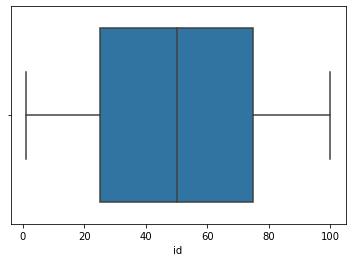

In [27]:
# Checking for outliers in our dataset
sns.boxplot(data=budget_df, x="id");

No outliers in the ID column

### 2.4.2 Votes Dataset

In [28]:
votes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [29]:
# Format the date into the pandas date format
votes_df['release_date'] = pd.to_datetime(votes_df['release_date'])

In [30]:
votes_df.head(2)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [31]:
votes_df.duplicated().sum()

1020

In [32]:
votes_df.drop_duplicates(keep="first", inplace=True)

In [33]:
votes_df.duplicated().sum()

0

In [34]:
votes_df.duplicated(["title","release_date"]).sum()

7

In [35]:
votes_df.drop_duplicates(["title","release_date"], keep="first", inplace=True)

In [36]:
votes_df.duplicated(["title","release_date"]).sum()

0

In [37]:
votes_df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

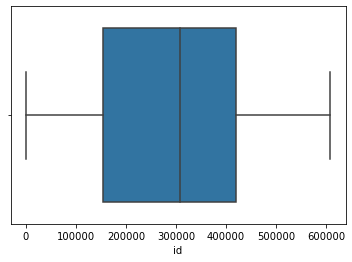

In [38]:
# Checking for outliers in our dataset
sns.boxplot(data=votes_df, x="id");

### 2.4.3 Gross Dataset

In [39]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [40]:
gross_df.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [41]:
# removing the quotations and commas in the foreign gross column
gross_df["foreign_gross"] = gross_df["foreign_gross"].replace({"''": "", ",": ""}, regex=True)

In [42]:
# Changing the datatype from object to float
gross_df["foreign_gross"] = gross_df["foreign_gross"].astype(float)

In [43]:
gross_df["title"].unique()
# Remember to get back to this and remove the years from the title i.e (2010) etc

array(['Toy Story 3', 'Alice in Wonderland (2010)',
       'Harry Potter and the Deathly Hallows Part 1', ..., 'El Pacto',
       'The Swan', 'An Actor Prepares'], dtype=object)

In [44]:
# Check for duplicates
gross_df.duplicated().sum()

0

In [45]:
# Check for duplicates in the title column
gross_df.duplicated(["title","year"]).sum()

0

In [46]:
# Check for missing values 
gross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

There are 5 missing values in the studio column, 28 in the domestic gross column and 1350 in the foreign gross column.

In [47]:
# We will drop the rows with missing values in the studio column
gross_df = gross_df.dropna(subset=['studio'])

In [48]:
# We will replace the missing values in the domestic gross column with their mean
gross_df["domestic_gross"].fillna(gross_df["domestic_gross"].mean(), inplace=True)

In [49]:
# We will drop the rows with missing values in the foreign gross column
gross_df = gross_df.dropna(subset=['foreign_gross'])

In [50]:
gross_df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

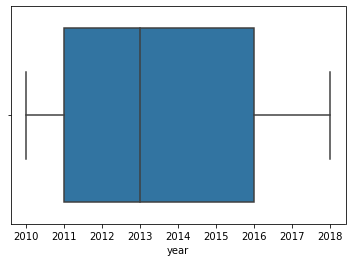

In [51]:
# Check for outliers in the data
sns.boxplot(data=gross_df, x="year");

There are no missing values or outliers in this dataset. We can proceed to the next dataset.

### 2.4.4 Basics Dataset

In [52]:
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [53]:
basics_df.head(2)
# Do we need to remove the tt from movie id?? we will look at this later

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [54]:
basics_df.nunique()

movie_id           146144
primary_title      136071
original_title     137773
start_year             19
runtime_minutes       367
genres               1085
dtype: int64

In [55]:
#Check for duplicates
basics_df.duplicated().sum()

0

In [56]:
# Check for duplicates in the title column
basics_df.duplicated(["primary_title","start_year"]).sum()

2072

In [57]:
# drop the duplicates in the title column
basics_df.drop_duplicates(["primary_title","start_year"], keep="first", inplace=True)

In [58]:
# Check for duplicates in the title column
basics_df.duplicated(["primary_title","start_year"]).sum()

0

In [59]:
# Check for missing values 
basics_df.isna().sum()

movie_id               0
primary_title          0
original_title        18
start_year             0
runtime_minutes    31218
genres              5192
dtype: int64

In [60]:
# We will drop the runtime minutes column as it has too many missing values in comparison to the total values
basics_df.drop("runtime_minutes", axis = 1, inplace = True)

In [61]:
# We will drop the rows with missing values in the genres column
basics_df = basics_df.dropna(subset=['genres'])

In [62]:
# Drop the rows with missing values in the original title column
basics_df = basics_df.dropna(subset=['original_title'])

In [63]:
# Check for any more missing values
basics_df.isna().sum()

movie_id          0
primary_title     0
original_title    0
start_year        0
genres            0
dtype: int64

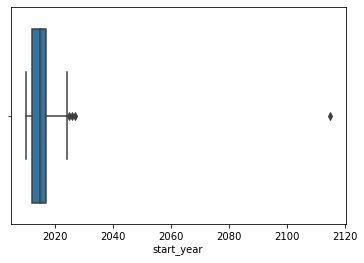

In [64]:
# Check for outliers in the data
sns.boxplot(data=basics_df, x="start_year");

In [65]:
# To remove outliers in the start year column
Q1 = basics_df["start_year"].quantile(0.25)
Q3 = basics_df["start_year"].quantile(0.75)
IQR = Q3-Q1
basics_df = basics_df[~((basics_df["start_year"]<(Q1-1.5*IQR)) | (basics_df["start_year"]>(Q3+1.5*IQR)))]

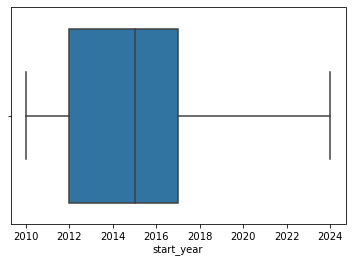

In [66]:
sns.boxplot(data=basics_df, x="start_year");

There are no outliers in the dataset. We can proceed to the next.

### 2.4.5 Ratings Dataset

In [67]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [68]:
ratings_df.head(2)
# Do we need to remove the tt from movie id?? we will look at this later

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [69]:
#Check for duplicates
ratings_df.duplicated().sum()

0

In [70]:
# Check for duplicates in the movie id column
ratings_df.duplicated(["movie_id"]).sum()

0

No duplicates in the movie id column or the ratings dataset.

In [71]:
ratings_df.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

No missing values in this dataset.

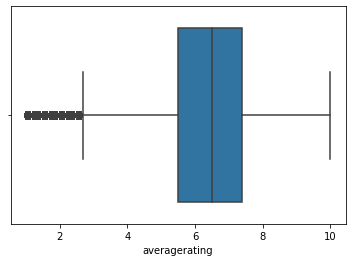

In [72]:
# Check for outliers in the data
sns.boxplot(data=ratings_df, x="averagerating");

These outliers can be ignored here.